# Gather Classification: Unknowns

In [1]:
import pandas as pd
import sourmash
import seaborn as sns
import matplotlib.pyplot as plt

### read in spillover dataset

In [2]:
spilloverdb = 'Spillover_dataset_Sept_22_2020.csv'
sp = pd.read_csv(spilloverdb)
sp.head()

/var/folders/pv/_f7m99kd33782sdc79lfqc300000gn/T/ipykernel_82174/3489051028.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  sp = pd.read_csv(spilloverdb)


,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,WilsonNoDiets,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA
0,1,NCB146845,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,2,NCB146846,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,3,NCB146847,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,4,NCB146848,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,5,NCB146849,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


## Matches against ICTV-VMR only

In [3]:
g_csv = 'from-farm/spillover-x-vmr_MSL38_v1.dna-k31-sc1.fastmultigather.csv'
m_csv = 'from-farm/spillover-x-vmr_MSL38_v1.dna-k31-sc1.manysearch.csv'

In [4]:
gDF = pd.read_csv(g_csv)
gDF.shape

(31998, 6)

In [5]:
mDF = pd.read_csv(m_csv)
mDF.shape

(38870, 8)

In [6]:
n_queries_matched_gather = gDF['query_name'].nunique()
n_refgenomes_matched_gather = gDF['match_name'].nunique()

n_queries_matched_manysearch = mDF['query_name'].nunique()
n_refgenomes_matched_manysearch = mDF['match_name'].nunique()

print('gather: # queries with match:',n_queries_matched_gather )
print('gather: # ref genomes with match:',n_refgenomes_matched_gather )
print('search: # queries genomes with match:',n_queries_matched_manysearch )
print('search: # ref genomes with match:',n_refgenomes_matched_manysearch)

gather: # queries with match: 18235
gather: # ref genomes with match: 352
search: # queries genomes with match: 18235
search: # ref genomes with match: 848


In [7]:
mDF['AccessionNumber'] = mDF['query_name'].str.split(' ', n=1, expand=True)[0]
mDF.head()

,query_name,query_md5,match_name,containment,intersect_hashes,match_md5,jaccard,max_containment,AccessionNumber
0,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000860085.1 Vaccinia virus,0.917526,178,NaN,NaN,NaN,FJ944556
1,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000857045.1 Monkeypox virus,0.458763,89,NaN,NaN,NaN,FJ944556
2,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000839185.1 Cowpox virus,0.298969,58,NaN,NaN,NaN,FJ944556
3,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000869985.1 Taterapox virus,0.247423,48,NaN,NaN,NaN,FJ944556
4,FJ944556 Cowpox virus,7ff2a3c66f4231a8f9f70642198fec59,GCF_000839105.1 Camelpox virus,0.242268,47,NaN,NaN,NaN,FJ944556


In [8]:
matched_accs = set(mDF['AccessionNumber'].tolist())

In [9]:
not_matched = sp[~sp['AccessionNumber'].isin(matched_accs)]
not_matched.shape

(17510, 55)

## Matches against GenBank 62k (includes ICTV VMR)

In [10]:
gc_csv = 'from-farm/spillover-x-genbank-2023-05-viral.dna-k31-sc1.fastmultigather.csv'
mc_csv = 'from-farm/spillover-x-genbank-2023-05-viral.dna-k31-sc-1.manysearch.csv'

In [11]:
gc = pd.read_csv(gc_csv)
mc = pd.read_csv(mc_csv)

In [12]:
n_queries_matched_gather = gc['query_name'].nunique()
n_refgenomes_matched_gather = gc['match_name'].nunique()

n_queries_matched_manysearch = mc['query_name'].nunique()
n_refgenomes_matched_manysearch = mc['match_name'].nunique()

print('gather: # queries with match:',n_queries_matched_gather )
print('gather: # ref genomes with match:',n_refgenomes_matched_gather )
print('search: # queries genomes with match:',n_queries_matched_manysearch )
print('search: # ref genomes with match:',n_refgenomes_matched_manysearch)

gather: # queries with match: 28173
gather: # ref genomes with match: 888
search: # queries genomes with match: 28042
search: # ref genomes with match: 3107


In [32]:
ms_match_names = mc['match_name'].unique().tolist()
gc_match_names = gc['match_name'].unique().tolist()
print('search: # ref genomes with manysearch match:',len(ms_match_names))
print('search: # ref genomes with gather match:',len(gc_match_names))
all_ref_genomes = set(ms_match_names)
gc_ref = set(gc_match_names)
all_ref_genomes.update(gc_ref)

search: # ref genomes with manysearch match: 3107
search: # ref genomes with gather match: 888


In [33]:
print(len(all_ref_genomes))

3132


In [41]:
# Open a CSV file to write
import csv
with open('manysearch-fastgather-ref-picklist.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['ident', 'ident_prefix', 'name'])

    # Iterate through each item in the set and write to the CSV
    for match_name in all_ref_genomes:
        ident= match_name.split(' ', 1)[0]
        ident_prefix = ident.split('.')[0]
        writer.writerow([ident, ident_prefix, match_name])

In [13]:
gc['AccessionNumber'] = gc['query_name'].str.split(' ', n=1, expand=True)[0]
mc['AccessionNumber'] = mc['query_name'].str.split(' ', n=1, expand=True)[0]

In [14]:
matched_accs_gb = set(gc['AccessionNumber'].tolist())

In [15]:
not_matched_gb = sp[~sp['AccessionNumber'].isin(matched_accs_gb)]
not_matched_gb.shape

(7572, 55)

In [16]:
not_matched_gb.head()

,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,WilsonNoDiets,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA
3,4,NCB146848,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,5,NCB146849,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
14,15,NCB146859,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
15,16,NCB146860,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
16,17,NCB146861,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [17]:
not_matched_gb['VirusSpecies'].nunique()

794

In [18]:
not_matched_gb['VirusFamily'].nunique()

19

In [19]:
not_matched_gb['VirusGenus'].nunique()

29

## merge in length to see if that is why we can't match?

In [20]:
dna_lengths = 'from-farm/2023-08-07-spillover.dna.lengths.csv'
dnaL = pd.read_csv(dna_lengths)
dnaL.rename(columns={'sequence_name': 'AccessionNumber'}, inplace=True)
dnaL.head()

,AccessionNumber,length
0,EU241637,490
1,EU241638,490
2,EU241639,490
3,EU241640,490
4,EU241641,372


In [21]:
not_matched_gb_len = pd.merge(not_matched_gb, dnaL, on='AccessionNumber', how='left')
not_matched_gb_len.shape

(7572, 56)

In [22]:
# View summary statistics
print(not_matched_gb_len['length'].describe())

count    5656.000000
mean      417.199788
std       205.835477
min        83.000000
25%       289.000000
50%       370.000000
75%       530.000000
max      4413.000000
Name: length, dtype: float64


In [23]:
not_matched_gb_len.columns

Index(['Column1', 'IndividualID', 'HostClass', 'HostOrder', 'HostFamily',
       'HostGenus', 'HostSpecies', 'Virus', 'VirusSpecies', 'VirusGenus',
       'VirusFamily', 'AccessionNumber', 'InterfaceP1', 'SampleType',
       'Latitude', 'Longitude', 'Country', 'DivergenceHumansMYA', 'DataSource',
       'SiteID', 'MYAgroup', 'Genome_General', 'Segmented', 'Envelope',
       'VirusHumans_Final', 'VirusTerrMamm_Final', 'VirusBirds_Final',
       'VirusOtherAnim_Final', 'PercentageHumanGroup',
       'PercentageTerrMammGroup', 'PercentageBirdsGroup',
       'PercentageOtherAnimGroup', 'PercentMoreOnehostGroup',
       'Epidemics_Final', 'Pandemic', 'PercentageHumanPathGroup',
       'SeverityDiseaseHumans', 'KnownMammal_TerrPathogenicity',
       'KnownBirdPathogenicity', 'KnownOtherAnimalPathogenicity',
       'Total_transmission', 'ChronicityHumans', 'HumanToHumanTransVirus',
       'AnimalToHuman', 'NoHabitats_total', 'WilsonNoDiets',
       'ConservationStatus', 'TaxaGroup', 'HostGeog

In [24]:
not_matched_gb_len[not_matched_gb_len['length'] >=1200]

,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA,length
8,75,NCB695390,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
9,76,NCB695391,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
10,77,NCB695392,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus scapulatus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
11,78,NCB695393,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
12,79,NCB695394,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
13,80,NCB695395,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
14,81,NCB695396,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
15,84,NCB695399,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus poliocephalus,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,VU,Terrestrial mammal,NationalLarge,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2039.0
16,85,NCB695400,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0
17,87,NCB695402,Mammalia,Chiroptera,Pteropodidae,Pteropus,Pteropus alecto,Australian bat lyssavirus,Australian bat lyssavirus,Lyssavirus,...,LC,Terrestrial mammal,SemiGlobal,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2040.0


In [25]:
not_matched_gb_len[not_matched_gb_len['length'] == 4413]['AccessionNumber']

7563    KJ641655
Name: AccessionNumber, dtype: object

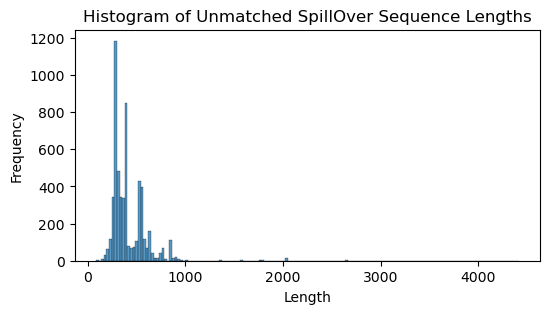

In [26]:
# Plot histogram
plt.figure(figsize=(6, 3))
sns.histplot(not_matched_gb_len['length'])
plt.title('Histogram of Unmatched SpillOver Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()